In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
kkk = 1

In [16]:
def g(x):
    n = 15
    m = 10
    return (x - 1) * np.exp(-m * x) + x**n
a = -1
b = 0.8

In [17]:
def fun_painter(func:list, names:list, points = None, title=None, start=a, end=b):
    global kkk
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    for i in range(len(func)):
        x = np.linspace(start, end, 1000)
        y = func[i](x)
        plt.plot(x, y, label=names[i])
    plt.legend()
    if title is not None:
        plt.title(title)
    if points is not None:
        plt.plot(points[0], points[1], marker='o', linestyle='')
    # name = "obrazek" + str(kkk) + ".png"
    # plt.savefig(name,bbox_inches='tight')
    # kkk+=1
    plt.show()

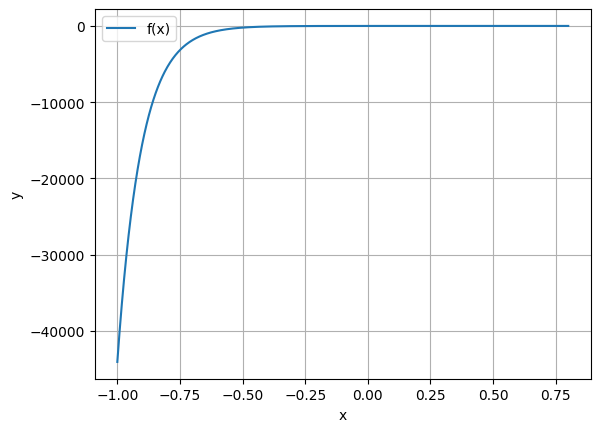

In [21]:
fun_painter([g],["f(x)"])